<a href="https://colab.research.google.com/github/ToluGb/Hamoye-DSI-2020/blob/master/HSDC_Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # for numerical computation
import pandas as pd # for data analysis and manipulation

In [3]:
from google.colab import drive # for reading files from the directory
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# We read the file into a pandas DataFrame and view the dataset
df = pd.read_csv('/content/drive/My Drive/household_power_consumption.txt', delimiter=';', na_values=['nan','?'])


In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df["Date"] = pd.to_datetime(df["Date"]) #convert Date to datetime
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
df = df.set_index('Date')
df.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
# To check the number of rows and columns (shape) of the dataset in the DataFrame
df.shape

(2075259, 8)

In [9]:
# To get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 to 2010-11-26
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Time                   object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
dtypes: float64(7), object(1)
memory usage: 142.5+ MB


In [10]:
# To check for missing values
df.isnull().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
# We use Frontfill to replace the missing data in the dataset
for NaN in range(0,8):        
        df.iloc[:,NaN] = df.iloc[:,NaN].fillna(df.iloc[:,NaN].ffill())

In [15]:
df.isnull().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

**Question 11**

In [16]:
#Downsample to daily data points
df_daily = df.resample('D').mean()
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [17]:
# We use Mean to replace the missing data in the dataset
for NaN in range(0,7):        
        df_daily.iloc[:,NaN] = df_daily.iloc[:,NaN].fillna(df_daily.iloc[:,NaN].mean())

In [18]:
# We verify again to ensure there are no more missing data
df_daily.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

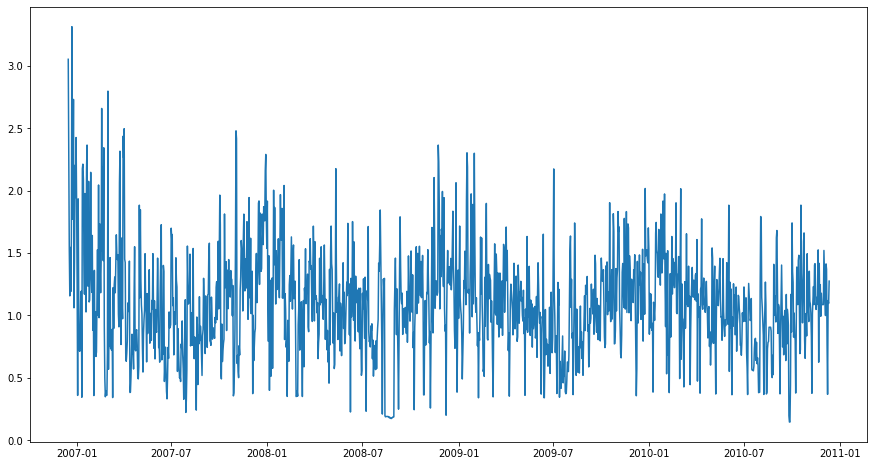

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(df_daily.Global_active_power)

**Question 12**

In [24]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.246362,-0.395647,0.998884,0.484388,0.434581,0.639681
Global_reactive_power,0.246362,1.000000,-0.111775,0.265558,0.123135,0.139438,0.090631
Voltage,-0.395647,-0.111775,1.000000,-0.407454,-0.194261,-0.165659,-0.260498
Global_intensity,0.998884,0.265558,-0.407454,1.000000,0.489283,0.440359,0.627569
Sub_metering_1,0.484388,0.123135,-0.194261,0.489283,1.000000,0.055102,0.103769
Sub_metering_2,0.434581,0.139438,-0.165659,0.440359,0.055102,1.000000,0.082118
Sub_metering_3,0.639681,0.090631,-0.260498,0.627569,0.103769,0.082118,1.000000


In [27]:
from scipy.stats import pearsonr 
# Apply the pearsonr() 
corr, _ = pearsonr(df.Global_active_power, df.Global_reactive_power) 
print('Pearsons correlation: %.2f' % corr) 

Pearsons correlation: 0.25


**Question 13**

In [31]:
corr, _ = pearsonr(df.Voltage, df.Global_intensity) 
print('Pearsons correlation: %.2f' % corr) 

Pearsons correlation: -0.41


In [17]:
# We use Frontfill to replace the missing data in the dataset
for NaN in range(0,7):        
        df_daily.iloc[:,NaN] = df_daily.iloc[:,NaN].fillna(df_daily.iloc[:,NaN].ffill())

**Question 14**

In [42]:
df_daily2 = df_daily[['Global_active_power']].reset_index()
df_daily2.head()

,Date,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [61]:
split = int(len(df_daily2)-365)


In [63]:
train = df_daily2[:split]
train.head()

,Date,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [65]:
test = df_daily2[split:]
test.head()

,Date,Global_active_power
1092,2009-12-12,1.261375
1093,2009-12-13,1.485287
1094,2009-12-14,1.246432
1095,2009-12-15,1.347303
1096,2009-12-16,0.968663


In [40]:
from fbprophet import Prophet

In [66]:
df_train = train.rename(columns={"Date": "ds", "Global_active_power": "y"})
df_train.head()

,ds,y
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [67]:
df_test = test.rename(columns={"Date": "ds", "Global_active_power": "y"})
df_test.head()

,ds,y
1092,2009-12-12,1.261375
1093,2009-12-13,1.485287
1094,2009-12-14,1.246432
1095,2009-12-15,1.347303
1096,2009-12-16,0.968663


In [75]:
model = Prophet()
actual = model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
pred = model.predict(df_test)

In [82]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-12,1.052047,0.919359,1.905149,1.052047,1.052047,0.356448,0.356448,0.356448,0.111041,0.111041,0.111041,0.245407,0.245407,0.245407,0.0,0.0,0.0,1.408495
1,2009-12-13,1.051986,0.929384,1.924965,1.051986,1.051986,0.341251,0.341251,0.341251,0.088727,0.088727,0.088727,0.252524,0.252524,0.252524,0.0,0.0,0.0,1.393238
2,2009-12-14,1.051926,0.723239,1.678557,1.051926,1.051926,0.187450,0.187450,0.187450,-0.072913,-0.072913,-0.072913,0.260363,0.260363,0.260363,0.0,0.0,0.0,1.239376
3,2009-12-15,1.051866,0.849703,1.834005,1.051866,1.051866,0.271267,0.271267,0.271267,0.002510,0.002510,0.002510,0.268757,0.268757,0.268757,0.0,0.0,0.0,1.323133
4,2009-12-16,1.051806,0.834522,1.817448,1.051806,1.051806,0.253312,0.253312,0.253312,-0.024206,-0.024206,-0.024206,0.277518,0.277518,0.277518,0.0,0.0,0.0,1.305117


In [83]:
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-12-12,1.408495,0.919359,1.905149,1.052047,1.052047,1.052047
1,2009-12-13,1.393238,0.929384,1.924965,1.051986,1.051986,1.051986
2,2009-12-14,1.239376,0.723239,1.678557,1.051926,1.051926,1.051926
3,2009-12-15,1.323133,0.849703,1.834005,1.051866,1.051866,1.051866
4,2009-12-16,1.305117,0.834522,1.817448,1.051806,1.051806,1.051806


In [90]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(y_true=df_test['y'], y_pred=pred['yhat'])
print('MAPE: %.2f' % MAPE) 

MAPE: 32.74


**Question 15**

In [97]:
# RMSE
from sklearn.metrics import  mean_squared_error
RMSE = np.sqrt(mean_squared_error(df_test['y'], pred['yhat']))
print('RMSE: %.2f' % RMSE) 

RMSE: 0.34


**Question 16**

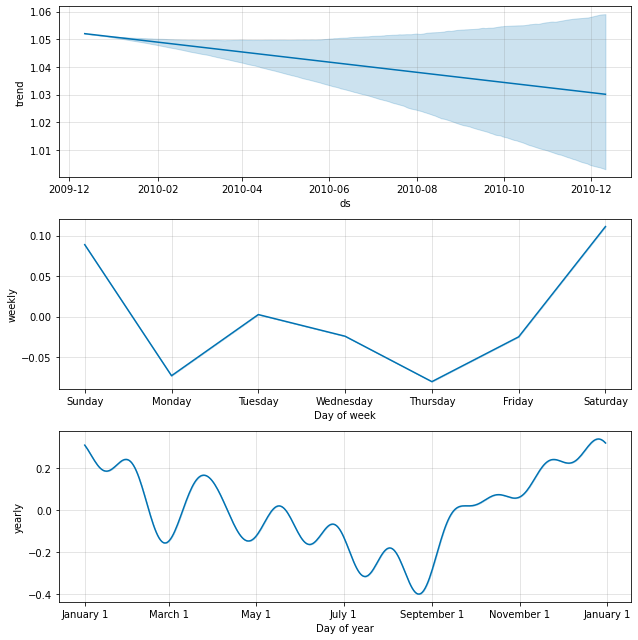

In [98]:
# Plot the components of the model
fig = model.plot_components(pred)